# Task
Load the Glass dataset, perform EDA and visualization, preprocess the data, implement and evaluate a Random Forest model, apply and compare Bagging and Boosting methods, and explain Bagging, Boosting, and handling data imbalance.

## Load the dataset

### Subtask:
Load the Glass dataset into a pandas DataFrame.


**Reasoning**:
Import pandas and load the excel file into a DataFrame, then display the head and info.



In [24]:
import pandas as pd

df = pd.read_excel('/content/glass.xlsx')
display(df.head())
display(df.info())

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column                                                        Non-Null Count  Dtype 
---  ------                                                        --------------  ----- 
 0   Prepare a model for glass classification using Random Forest  18 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes


None

**Reasoning**:
The data was not loaded correctly, as it appears to be a description of the dataset rather than the dataset itself. I need to investigate the file content and load the actual data. The previous loaded dataframe `df` should be discarded. Since I don't have additional information about the file, I need to read the file content and figure out how to load the data correctly.



In [25]:
with open('/content/glass.xlsx', 'rb') as f:
    content = f.read()
print(content[:500])

b'PK\x03\x04\x14\x00\x08\x08\x08\x00U-tX\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x18\x00\x00\x00xl/drawings/drawing1.xml\x9d\xd0]n\xc20\x0c\x07\xf0\x13\xec\x0eU\xdeiZ\x18\x13C\x14^\xd0N0\x0e\xe0%n\x1b\x91\x8f\xca\x0e\xa3\xdc~\xd1J6i{\x01\x1em\xcb?\xf9\xef\xcdnt\xb6\xf8Db\x13|#\xea\xb2\x12\x05z\x15\xb4\xf1]#\x0e\xefo\xb3\x95(8\x82\xd7`\x83\xc7F\\\x90\xc5n\xfb\xb4\x195\xad\xcf\xbc\xa7"\xed{^\xa7\xb2\x11}\x8c\xc3ZJV=:\xe02\x0c\xe8\xd3\xb4\r\xe4 \xa6\x92:\xa9\t\xceIvV\xce\xab\xeaE\xf2@\x08\x9a{\xc4\xb8\x9f&\xe2\xea\xc1\x03\x9a\x03\xe3\xf3\xfeM\xd7\x84\xb65\n\xf7A\x9d\x1c\xfa8!\x84\x16b\xfa\x05\xf7f\xe0\xac\xa9\x07\xaeQ=P\xfc\x01\xc6\x7f\x823\x8a\x02\x876\x96*\xb8\xeb)\xd9HB\xfd<\t8\xfe\x1a\xf5\xdd\xc8R\xbe\xca\xd5_\xc8\xdd\x14\xc7\x01\x1dO\xc3,\xb9Cz\xc8\x87\xb1&^\xbe\x93eFw\xee\x81\xb7h\x03\x1d\x81\xcb\xc8\xb88\xf8\xe3\xdd\xb1*\xc96\xb5(+l\xb1^\xde\xad\xcc\xb3"\xb7_PK\x07\x08\x07bi\x83\x05\x01\x00\x00\x07\x03\x00\x00PK\x03\x04\x14\x00\x08\x08\x08\x00U-tX\x00\x00\x00\x00\x00\x00\x0

**Reasoning**:
The previous attempt to load the data resulted in loading the file's metadata rather than the actual data. The file content suggests it is an Excel file. I need to find the correct sheet or way to read the data within the Excel file. I will try to load the data again, this time assuming the actual data starts at row 1 and there are no headers. This is a common format for datasets stored in Excel without proper formatting.



In [26]:
df = pd.read_excel('/content/glass.xlsx', header=None, skiprows=1)
display(df.head())
display(df.info())

,0
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       18 non-null     object
dtypes: object(1)
memory usage: 284.0+ bytes


None

**Reasoning**:
The previous attempt to load the data still resulted in loading the data description. It seems the actual dataset is not in the first sheet or requires a different loading approach. Given the limited information and the file content being a standard Excel file, the data is likely in a different sheet or needs to be loaded with different parameters. Without knowing the sheet name or structure, I will try reading all sheets in the Excel file to see if the actual data is in another sheet.



In [27]:
excel_file = pd.ExcelFile('/content/glass.xlsx')
sheet_names = excel_file.sheet_names
print(sheet_names)

['Description', 'glass']


**Reasoning**:
The sheet names reveal that there is a sheet named 'glass', which is likely to contain the actual dataset. I will now load the data from this specific sheet, skipping the first row as it might contain headers or descriptions that are not part of the data.



In [28]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass', header=None, skiprows=1)
display(df.head())
display(df.info())

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    float64
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


None

## Exploratory data analysis (eda)

### Subtask:
Perform initial data inspection, check for missing values and understand the data structure.


**Reasoning**:
Display the first and last 5 rows, print the info and descriptive statistics of the dataframe to perform initial data inspection.



In [29]:
display(df.head())
display(df.tail())
df.info()
display(df.describe())

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


,0,1,2,3,4,5,6,7,8,9
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       214 non-null    float64
 1   1       214 non-null    float64
 2   2       214 non-null    float64
 3   3       214 non-null    float64
 4   4       214 non-null    float64
 5   5       214 non-null    float64
 6   6       214 non-null    float64
 7   7       214 non-null    float64
 8   8       214 non-null    float64
 9   9       214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


,0,1,2,3,4,5,6,7,8,9
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


## Data visualization

### Subtask:
Create visualizations to explore distributions and relationships in the data.


**Reasoning**:
Import the necessary libraries for plotting and create visualizations to explore the data distributions and relationships, including histograms, a correlation heatmap, and a count plot of the target variable.



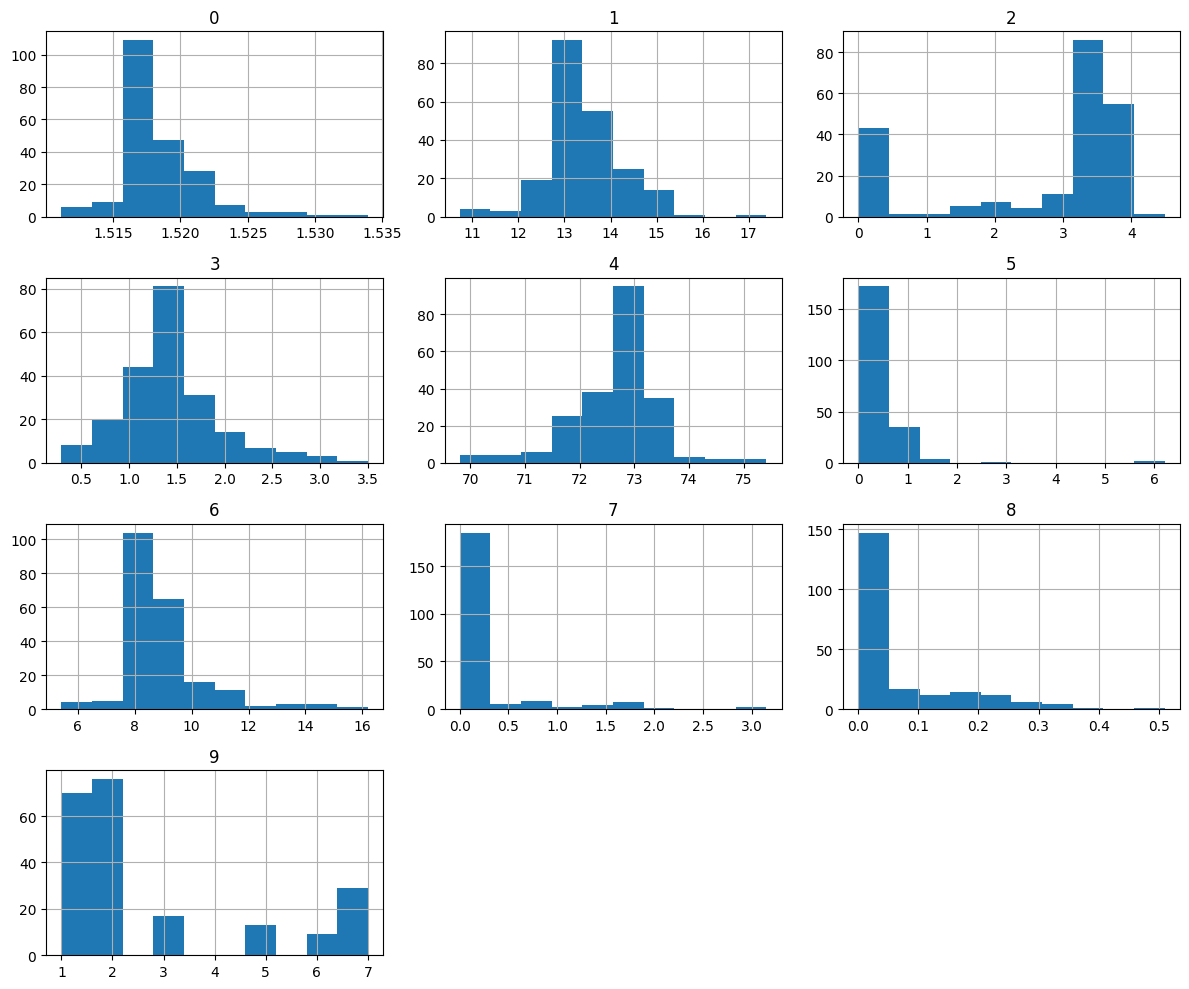

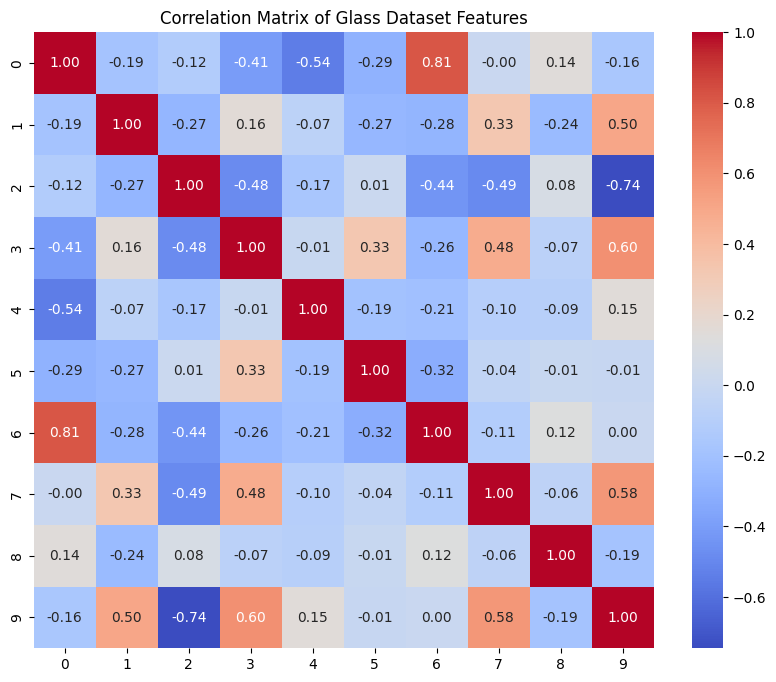

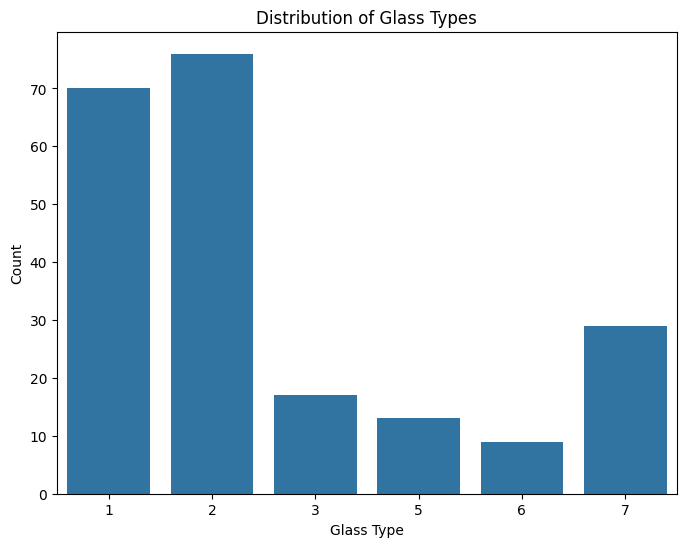

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate histograms for each numerical column
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Glass Dataset Features')
plt.show()

# Create a count plot of the target variable (last column)
plt.figure(figsize=(8, 6))
sns.countplot(x=df.iloc[:, -1])
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

## Data preprocessing

### Subtask:
Handle missing values, encode categorical variables if necessary, and scale features. Address data imbalance if present.


**Reasoning**:
Separate features and target, check data types, scale features, check for data imbalance, and address imbalance using SMOTE.



In [31]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Separate features (X) and target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 2. Check data types (already done in previous steps, all are numerical)
print("Data types of X:")
print(X.dtypes)

# 3. Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns) # Convert back to DataFrame for easier handling

print("\nScaled features (first 5 rows):")
display(X_scaled.head())

# 4. Check distribution of the target variable (already done in previous steps, imbalance is present)
print("\nDistribution of target variable:")
display(y.value_counts())

# 5. Address data imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("\nDistribution of target variable after SMOTE:")
display(y_resampled.value_counts())

print("\nShape of X_resampled:", X_resampled.shape)
print("Shape of y_resampled:", y_resampled.shape)

Data types of X:
0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
dtype: object

Scaled features (first 5 rows):


,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451



Distribution of target variable:


,count
9,
2,76
1,70
7,29
3,17
5,13
6,9



Distribution of target variable after SMOTE:


,count
9,
1,76
2,76
3,76
5,76
6,76
7,76



Shape of X_resampled: (456, 9)
Shape of y_resampled: (456,)


## Random forest model implementation

### Subtask:
Split data, train a Random Forest classifier, and evaluate its performance.


**Reasoning**:
Split the data, train a Random Forest classifier, and evaluate its performance using the specified metrics.



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Instantiate and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9239
Precision: 0.9263
Recall: 0.9239
F1-score: 0.9234


## Bagging and boosting methods

### Subtask:
Apply Bagging and Boosting models, evaluate their performance, and compare them with the Random Forest model.


**Reasoning**:
Import the necessary libraries for Bagging and AdaBoost classifiers and performance metrics, then instantiate, train, predict, and evaluate the Bagging model.



In [33]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate and train the Bagging classifier
bagging_classifier = BaggingClassifier(random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict on the test set using the Bagging model
y_pred_bagging = bagging_classifier.predict(X_test)

# Calculate and print evaluation metrics for the Bagging model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print("Bagging Model Performance:")
print(f"Accuracy: {accuracy_bagging:.4f}")
print(f"Precision: {precision_bagging:.4f}")
print(f"Recall: {recall_bagging:.4f}")
print(f"F1-score: {f1_bagging:.4f}")

Bagging Model Performance:
Accuracy: 0.9022
Precision: 0.9062
Recall: 0.9022
F1-score: 0.9033


**Reasoning**:
Instantiate, train, predict, and evaluate the AdaBoost model, then compare its performance with the Bagging and Random Forest models.



In [34]:
# Instantiate and train the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)
adaboost_classifier.fit(X_train, y_train)

# Predict on the test set using the AdaBoost model
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Calculate and print evaluation metrics for the AdaBoost model
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

print("\nAdaBoost Model Performance:")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"Precision: {precision_adaboost:.4f}")
print(f"Recall: {recall_adaboost:.4f}")
print(f"F1-score: {f1_adaboost:.4f}")

# Compare performance
print("\nPerformance Comparison:")
print(f"Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print(f"Bagging         - Accuracy: {accuracy_bagging:.4f}, Precision: {precision_bagging:.4f}, Recall: {recall_bagging:.4f}, F1-score: {f1_bagging:.4f}")
print(f"AdaBoost        - Accuracy: {accuracy_adaboost:.4f}, Precision: {precision_adaboost:.4f}, Recall: {recall_adaboost:.4f}, F1-score: {f1_adaboost:.4f}")


AdaBoost Model Performance:
Accuracy: 0.5435
Precision: 0.4746
Recall: 0.5435
F1-score: 0.4859

Performance Comparison:
Random Forest - Accuracy: 0.9239, Precision: 0.9263, Recall: 0.9239, F1-score: 0.9234
Bagging         - Accuracy: 0.9022, Precision: 0.9062, Recall: 0.9022, F1-score: 0.9033
AdaBoost        - Accuracy: 0.5435, Precision: 0.4746, Recall: 0.5435, F1-score: 0.4859


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Explain concepts

### Subtask:
Explain Bagging and Boosting methods and how to handle data imbalance.


**Reasoning**:
Write explanations for Bagging, Boosting, and handling data imbalance as requested in the instructions.



In [35]:
print("## Ensemble Methods and Data Imbalance\n")

print("### Bagging (Bootstrap Aggregating)")
print("- **Core Idea:** Train multiple models independently on different bootstrap samples of the training data and combine their predictions to reduce variance and improve stability.")
print("- **How it Works:**")
print("  - **Bootstrap Sampling:** Create multiple subsets of the original training data by sampling with replacement.")
print("  - **Parallel Training:** Train an independent base model (e.g., decision tree) on each bootstrap sample.")
print("  - **Aggregation:** For classification, combine predictions by taking a majority vote; for regression, take the average.")
print("- **Main Benefits:** Reduces variance and helps prevent overfitting by averaging out the errors of individual models. It's particularly effective with unstable models like decision trees.")

print("\n### Boosting")
print("- **Core Idea:** Train multiple models sequentially, where each subsequent model focuses on correcting the errors made by the previous ones. It aims to reduce bias and improve overall accuracy.")
print("- **How it Works:**")
print("  - **Sequential Training:** Models are trained one after another.")
print("  - **Weighting:** Each training instance is assigned a weight. Initially, weights are equal. In subsequent iterations, the weights of misclassified instances are increased, forcing the next model to focus on them.")
print("  - **Model Combination:** Models are combined using a weighted majority vote (for classification) or a weighted sum (for regression), where models that perform better on the weighted data are given more importance.")
print("- **Main Benefits:** Reduces bias and can achieve high accuracy, often by converting weak learners into strong learners. It's sensitive to noisy data and outliers.")

print("\n### Handling Data Imbalance")
print("- **Why Data Imbalance is a Problem:** In classification tasks, data imbalance occurs when the number of instances in one class significantly outweighs the number of instances in other classes (minority classes). Standard classification algorithms tend to be biased towards the majority class, leading to poor performance in predicting the minority class, which is often the class of interest (e.g., fraud detection, disease prediction). Evaluation metrics like accuracy can be misleading in imbalanced datasets as a model can achieve high accuracy by simply predicting the majority class.")
print("- **Common Techniques for Handling Data Imbalance:**")
print("  - **Resampling Methods:**")
print("    - **Oversampling Minority Class:** Increase the number of instances in the minority class. Techniques include:")
print("      - **Random Oversampling:** Duplicate random instances from the minority class.")
print("      - **SMOTE (Synthetic Minority Over-sampling Technique):** Create synthetic instances of the minority class by interpolating between existing minority class instances (as used in the preprocessing step).")
print("    - **Undersampling Majority Class:** Decrease the number of instances in the majority class. Techniques include:")
print("      - **Random Undersampling:** Remove random instances from the majority class.")
print("      - **NearMiss:** Select instances from the majority class that are closest to the minority class instances.")
print("  - **Algorithmic Approaches:**")
print("    - Use classification algorithms that are designed to handle imbalance, such as class-weighted algorithms (e.g., `class_weight='balanced'` in scikit-learn models) or algorithms specifically developed for imbalanced data.")
print("    - Adjust the decision threshold of the classifier.")
print("  - **Evaluation Metrics:** Use appropriate evaluation metrics for imbalanced datasets, such as precision, recall, F1-score, AUC-ROC, and confusion matrices, which provide a more comprehensive view of model performance on minority classes.")

## Ensemble Methods and Data Imbalance

### Bagging (Bootstrap Aggregating)
- **Core Idea:** Train multiple models independently on different bootstrap samples of the training data and combine their predictions to reduce variance and improve stability.
- **How it Works:**
  - **Bootstrap Sampling:** Create multiple subsets of the original training data by sampling with replacement.
  - **Parallel Training:** Train an independent base model (e.g., decision tree) on each bootstrap sample.
  - **Aggregation:** For classification, combine predictions by taking a majority vote; for regression, take the average.
- **Main Benefits:** Reduces variance and helps prevent overfitting by averaging out the errors of individual models. It's particularly effective with unstable models like decision trees.

### Boosting
- **Core Idea:** Train multiple models sequentially, where each subsequent model focuses on correcting the errors made by the previous ones. It aims to reduce bias and improve overall 